In [22]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [33]:
import pandas as pd
import nltk
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.metrics import classification_report_imbalanced
from sklearn import svm
from Visualization import Visualization

In [24]:
data = pd.read_csv("rebtel_w_lexicon.csv")

In [25]:
top_words = 125 #145 
vectorizer = CountVectorizer(ngram_range=(1,2))
RANDOM_STATE = 42

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2),max_features = top_words)


In [27]:
tfidf = False

x_fts = vectorizer.fit_transform(data['Rel_w_title_review'])
if tfidf:
    x_fts = tfidf_vectorizer.fit_transform(data['Rel_w_review'])
x_fts = x_fts.toarray()





In [28]:
train_size = 0.75
train_size = int(len(x_fts)* train_size)

x_train, y_train = x_fts[0:train_size], data['Rating'][0:train_size]
X_test, Y_test = x_fts[train_size:], data['Rating'][train_size:] 

In [29]:
clf = svm.SVC(decision_function_shape='ovo',random_state=RANDOM_STATE,probability=True)
#clf = RandomForestClassifier(n_estimators= 70, n_jobs=-1,random_state=RANDOM_STATE)
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
test_preds = clf.predict(X_test)

In [31]:
print(classification_report_imbalanced(y_pred=test_preds,y_true=Y_test))


                   pre       rec       spe        f1       geo       iba       sup

          1       0.00      0.00      1.00      0.00      0.00      0.00        14
          2       0.00      0.00      1.00      0.00      0.00      0.00        14
          3       0.00      0.00      1.00      0.00      0.00      0.00        38
          4       0.00      0.00      1.00      0.00      0.00      0.00       105
          5       0.62      1.00      0.00      0.77      0.00      0.00       282

avg / total       0.39      0.62      0.38      0.48      0.00      0.00       453



/Users/rcortez/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rcortez/anaconda/envs/python3/lib/python3.5/site-packages/imblearn/metrics/classification.py:238: UndefinedMetricWarning: Specificity is ill-defined and being set to 0.0 in labels with no predicted samples.
  warn_for)
/Users/rcortez/anaconda/envs/python3/lib/python3.5/site-packages/imblearn/metrics/classification.py:240: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples.
  average, warn_for)


In [34]:
vis = Visualization()

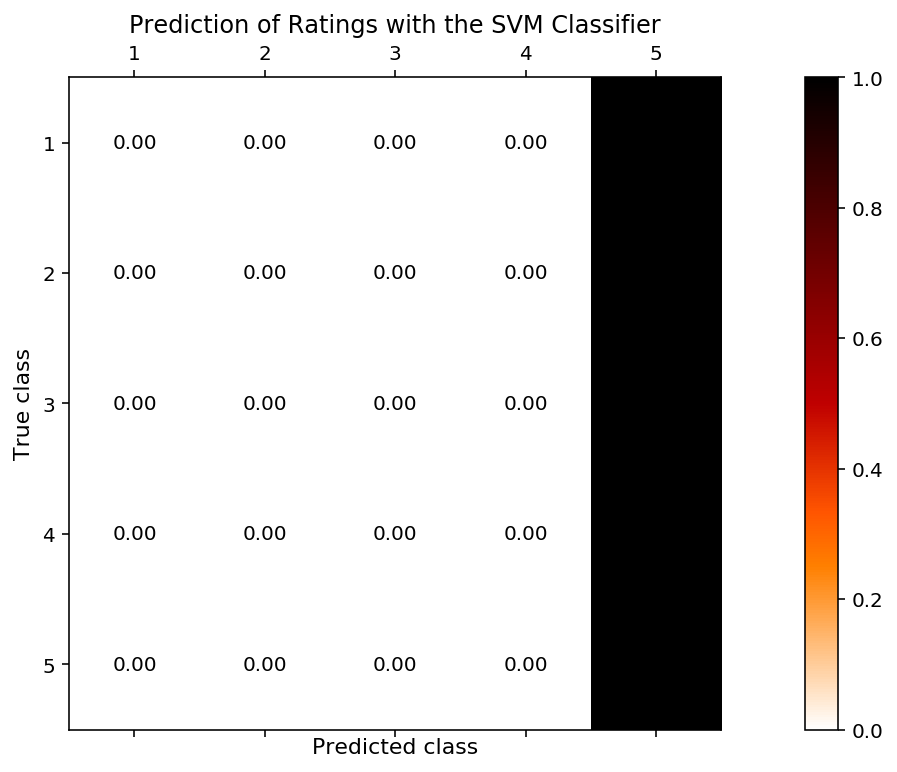

In [37]:
vis.plot_confusion_matrix(Y_test, test_preds, 
                          'Prediction of Ratings with the SVM Classifier')